In [1]:
from typing import Self

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
X, y, *_ = make_regression(n_samples=1000, n_features=1, noise=5, random_state=42)
X.shape, y.shape

((1000, 1), (1000,))

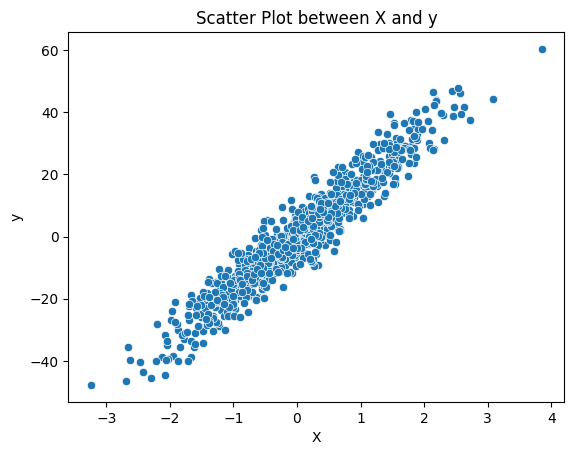

In [3]:
sns.scatterplot(x=X.ravel(), y=y)
plt.title("Scatter Plot between X and y")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
X_train.shape, X_test.shape

((750, 1), (250, 1))

In [5]:
X_train[:10]

array([[-0.11473644],
       [-1.28042935],
       [ 0.48100923],
       [ 0.07409478],
       [-0.68002472],
       [ 1.18839327],
       [ 3.07888081],
       [ 0.06023021],
       [-0.93782504],
       [ 1.23781631]])

In [6]:
y_train[:10]

array([ -1.75434169, -14.56563057,   6.2536998 ,   2.57045091,
       -11.09351903,  16.33474814,  44.316608  ,  -1.23585303,
       -19.21109433,  18.55099979])

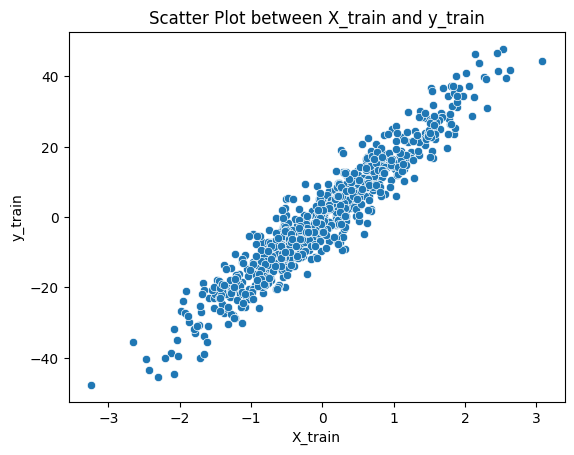

In [7]:
sns.scatterplot(x=X_train.ravel(), y=y_train)
plt.title("Scatter Plot between X_train and y_train")
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.show()

In [2]:
class MyLR:
    def __init__(self) -> None:
        self._m = None
        self._b = None

    def fit(
        self,
        X_train: pd.DataFrame | np.ndarray,
        y_train: pd.DataFrame | np.ndarray,
    ):
        numerator = 0
        denominator = 0

        X_train_mean = X_train.mean()
        y_train_mean = y_train.mean()

        for i in range(X_train.shape[0]):
            numerator += (X_train[i] - X_train_mean) * (y_train[i] - y_train_mean)
            denominator += np.power(X_train[i] - X_train_mean, 2)

        self._m = numerator / denominator
        self._b = y_train_mean - (self._m * X_train_mean)

    def predict(self, X_test: pd.DataFrame | np.ndarray) -> np.ndarray:
        if self._m is None or self._b is None:
            raise ValueError("First train the model using `.fit` method.")

        return np.array((self._m * X_test) + self._b)

    @property
    def intercept_(self):
        return self._b

    @property
    def coef_(self):
        return self._m

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

NameError: name 'pd' is not defined

In [28]:
my_lr = MyLR()
my_lr.fit(X_train, y_train)

### Linear Regression class property and parameters

In [29]:
b = my_lr.intercept_
b

array([-0.04040339])

In [30]:
m = my_lr.coef_
m

array([16.56382958])

In [25]:
# Return the coefficient of determination of the prediction.
my_lr.score(X_train, y_train), my_lr.score(X_test, y_test)

(0.9107600383361344, 0.9281938602708797)

### `.predict()` method

In [13]:
y_pred = my_lr.predict(X_test)
y_pred[:10]

array([[-13.55334592],
       [  2.82813596],
       [ -0.44000722],
       [  6.61348112],
       [-22.88721202],
       [ 26.08826392],
       [ -7.23732485],
       [  5.48631886],
       [-20.76363546],
       [  2.38973711]])

In [26]:
mean_squared_error(y_test, y_pred)

24.10667020620263

In [14]:
y_test[:10]

array([-18.58476319,   8.93124584,   0.8021375 ,   6.52752909,
       -27.92321588,  22.09439874, -11.17281327,   6.34983667,
       -20.27625029,   3.60211083])

## Plot the regression line on the scatterplot

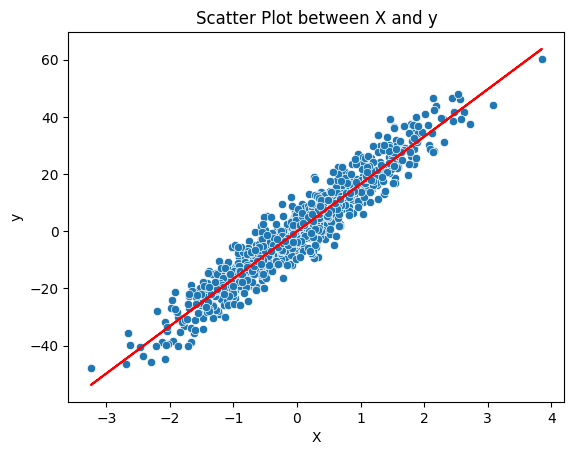

In [15]:
sns.scatterplot(x=X.ravel(), y=y)
plt.plot(X, my_lr.predict(X), color="red")
plt.title("Scatter Plot between X and y with Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()